In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.keras.models import load_model
model = load_model("fruit_quality_detector.keras")


In [3]:
class_names = ['Fresh', 'Mild', 'Rotten'] 

In [4]:
img_path = r"C:\Users\Aditya Reddy\Desktop\tomato.jpeg"

In [5]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0  # Normalize image


In [6]:
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step


✅ Predicted: Fresh, 🎯 Confidence: 0.95


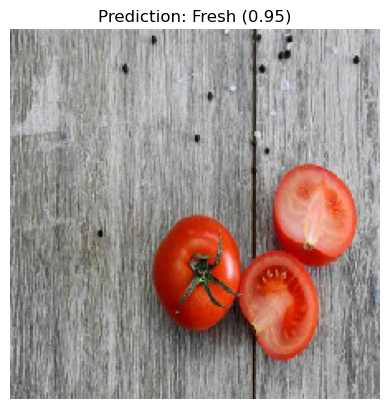

In [7]:
if predicted_index < len(class_names):
    predicted_class = class_names[predicted_index]
    confidence = np.max(predictions)

    # Show result
    print(f"✅ Predicted: {predicted_class}, 🎯 Confidence: {confidence:.2f}")
    
    # Optional: show the image
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f})")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ Prediction index is out of bounds. Check your class_names list and model output.")

In [8]:
num_classes = predictions.shape[1] if len(predictions.shape) > 1 else 1
print(f"Expected number of classes: {num_classes}")

Expected number of classes: 3


In [9]:
if num_classes == 1:
    # Binary classification (e.g., Fresh vs Rotten)
    class_names = ['Fresh', 'Rotten']  # adjust as per training
    predicted_index = int(predictions[0][0] > 0.5)
    predicted_class = class_names[predicted_index]
    confidence = predictions[0][0] if predicted_class == 'Rotten' else 1 - predictions[0][0]



In [10]:
# Show result
print(f"✅ Predicted: {predicted_class}, 🎯 Confidence: {confidence:.2f}")

✅ Predicted: Fresh, 🎯 Confidence: 0.95
